In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
bikes_data=pd.read_csv('bikes.csv')
bikes_data

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
5,2011-01-08,1.967445,48.851252,17.035029,112.333333
6,2011-01-09,1.210973,48.557576,18.331855,76.666667
7,2011-01-10,0.454501,48.263900,19.628680,41.000000
8,2011-01-11,1.361393,59.623460,12.414597,43.000000
9,2011-01-12,1.541997,54.775880,25.432188,25.000000


In [3]:
df=pd.DataFrame(data=bikes_data)
df

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
5,2011-01-08,1.967445,48.851252,17.035029,112.333333
6,2011-01-09,1.210973,48.557576,18.331855,76.666667
7,2011-01-10,0.454501,48.263900,19.628680,41.000000
8,2011-01-11,1.361393,59.623460,12.414597,43.000000
9,2011-01-12,1.541997,54.775880,25.432188,25.000000


In [4]:
df.shape

(191, 5)

In [5]:
df.dtypes

date            object
temperature    float64
humidity       float64
windspeed      float64
count          float64
dtype: object

In [6]:
df.describe()

,temperature,humidity,windspeed,count
count,191.000000,191.000000,191.000000,191.000000
mean,15.319033,55.469244,18.605591,461.976440
std,9.876723,7.998748,5.049424,321.669925
min,-2.200000,21.300000,6.941802,9.000000
25%,6.091402,49.593148,14.600733,144.000000
50%,15.769749,55.080463,18.474898,460.000000
75%,24.255189,62.046729,21.621460,740.333333
max,33.113161,72.575560,33.512660,1246.000000


In [7]:
df.isnull().sum()

date           0
temperature    0
humidity       0
windspeed      0
count          0
dtype: int64

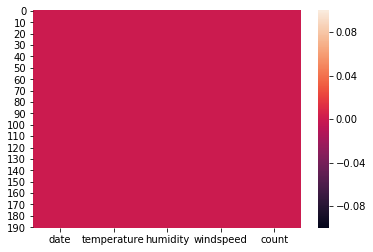

In [8]:
sns.heatmap(df.isnull())

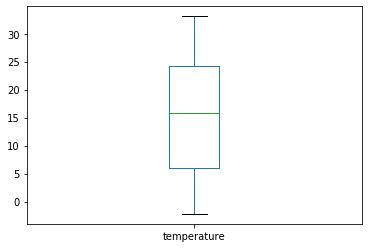

In [10]:
df['temperature'].plot.box()

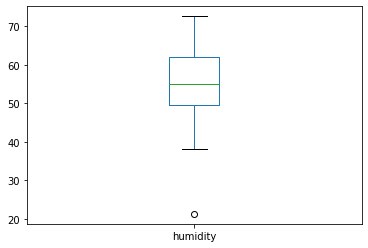

In [11]:
df['humidity'].plot.box()

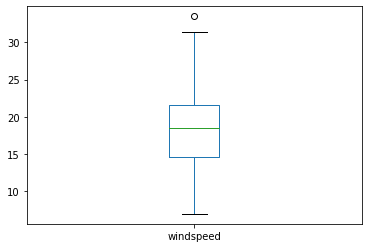

In [12]:
df['windspeed'].plot.box()

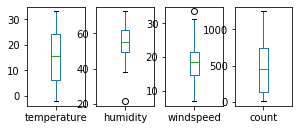

In [13]:
df.plot(kind='box',subplots=True,layout=(2,5))
plt.show()

In [20]:
x=df.iloc[:,1:4].values
y=df.iloc[:,4].values

In [22]:
def linreg():
    lm=LinearRegression()
    lm.fit(x,y)
    print('score=',lm.score(x,y))
    print('coefficient=',lm.coef_)
    print('Intercept=',lm.intercept_)

In [23]:
linreg()

score= 0.8215381259000372
coefficient= [29.56826956 -4.18508064 -5.69161051]
Intercept= 347.0581791865112


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [26]:
x_train.shape

(133, 3)

In [27]:
y_train.shape

(133,)

In [28]:
x_test.shape

(58, 3)

In [29]:
y_test.shape

(58,)

In [30]:
lm=LinearRegression()

In [31]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lm.coef_

array([29.5877459 , -4.87171948, -5.32679896])

In [33]:
lm.intercept_

373.3578777590345

In [34]:
lm.score(x_train,y_train)

0.8529405935502057

In [35]:
pred=lm.predict(x_test)
print("predicted result",pred)
print("actual result",y_test)

predicted result [ 254.55717603  604.60838278  689.30443464  347.22884477  531.49357708
  259.71788993   43.95153651  564.35115189  774.17544664   47.11931808
  102.83837798  578.83773518 1018.06455425  767.68083528  519.2163712
  783.21659815   33.38518337  513.96567897  587.11763814  611.67455086
  291.73643079  869.65674282  536.73735988  943.54926344  829.98335352
  806.12332367  146.6418502   182.89416081  852.06602801  170.55093824
  130.69790794  278.39477375  458.9391488   298.51030775  457.36538234
   76.09224761  877.11383841  636.23146357  651.54596878   57.03960255
  647.56915813  338.97504589  480.38319643  575.61509729  824.72321975
  386.88677362   97.95963255  112.39826103  792.16439973  170.81005727
  907.98286315  498.63600228   26.25196678  821.91609473  247.39690011
  265.05311671  847.41760469  190.11849192]
actual result [ 177.          884.          727.          399.66666667  817.33333333
  289.           75.          740.66666667  871.           41.
  112.33333

In [36]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7526690567316923


In [38]:
print("error:")
print(mean_squared_error(y_test,pred))

error:
27080.27580264769
